In [2]:
from mnist import Model
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
import random
import matplotlib.pyplot as plt


In [3]:
class Model:
    def __init__(self, dataset):
        """
        input: mnist dataset before splitting the dataset
        """
        self.dataset = dataset
        self.model = None
        self.X_train = self.y_train = None
        self.X_test = self.y_test = None

        # Preprocess the data
        self.preprocess_data()

        # Build the model
        self.build_model()

    def preprocess_data(self):
        # Unpack the dataset
        (self.X_train, self.y_train), (self.X_test, self.y_test) = self.dataset.load_data()

        # Normalize the images
        self.X_train, self.X_test = self.X_train / 255.0, self.X_test / 255.0

        # Convert labels to categorical one-hot encoding
        # self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
        # self.y_test = tf.keras.utils.to_categorical(self.y_test, 10)
        print(self.y_train.shape)

    def build_model(self):
        # Define the model architecture
        self.model = models.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),
            
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])

        # Compile the model
        self.model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
                        )

    def train(self, epochs=5, verbose=2):
        # Train the model
        self.model.fit(self.X_train, self.y_train, epochs=epochs, verbose=verbose)

    def evaluate(self):
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(self.X_test, self.y_test)
        print(f'Test accuracy: {test_acc}')
        return test_loss, test_acc
    
    def predict(self, image):
        # Predict the class probabilities (prediction, probabilities)
        predictions = self.model.predict(np.array([image]))
        predicted_class = np.argmax(predictions[0])
        
        return predicted_class, predictions[0]
    
    def save(self, filename):
        self.model.save(filename, save_format='tf')

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
# Initialize the model with the dataset
model = Model(mnist)

(60000,)


In [6]:
# Train the model
model.train(epochs=10)

Epoch 1/10
1875/1875 - 30s - 16ms/step - loss: 0.2038 - sparse_categorical_accuracy: 0.9373
Epoch 2/10
1875/1875 - 34s - 18ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9730
Epoch 3/10
1875/1875 - 37s - 20ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9768
Epoch 4/10
1875/1875 - 35s - 19ms/step - loss: 0.0641 - sparse_categorical_accuracy: 0.9801
Epoch 5/10
1875/1875 - 36s - 19ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9826
Epoch 6/10
1875/1875 - 35s - 19ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9840
Epoch 7/10
1875/1875 - 38s - 20ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0.9859
Epoch 8/10
1875/1875 - 36s - 19ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9867
Epoch 9/10
1875/1875 - 35s - 19ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9866
Epoch 10/10
1875/1875 - 34s - 18ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9886


In [7]:
# Evaluate the model
model.evaluate()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9902
Test accuracy: 0.9926000237464905


(0.020954212173819542, 0.9926000237464905)

In [8]:
def display_number(X):
    plt.imshow(X, cmap='gray', interpolation='nearest')
    # plt.colorbar()
    plt.show()


In [9]:
methods = dir(model)
print('predict' in methods)
print(methods)

True
['X_test', 'X_train', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'build_model', 'dataset', 'evaluate', 'model', 'predict', 'preprocess_data', 'save', 'train', 'y_test', 'y_train']


In [10]:
t = [
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        127,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        191,
        255,
        0,
        0,
        128,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        64,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        255,
        0,
        255,
        191,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        191,
        255,
        0,
        0,
        255,
        128,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        64,
        255,
        191,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        191,
        255,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        255,
        255,
        128,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        128,
        255,
        255,
        255,
        255,
        191,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        64,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        191,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        64,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        255,
        191,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ]
]
t = np.array(t)

three = [
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        64,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        64,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        255,
        64,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        128,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        128,
        128,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        128,
        128,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        191,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        254,
        255,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ]
]
three = np.array(three)

four = [
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        251,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        127,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        128,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        255,
        128,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        255,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0
    ]
]
four = np.array(four)


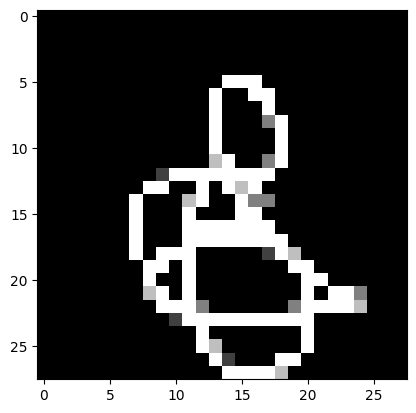

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
PREDICTION:  (8, array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))


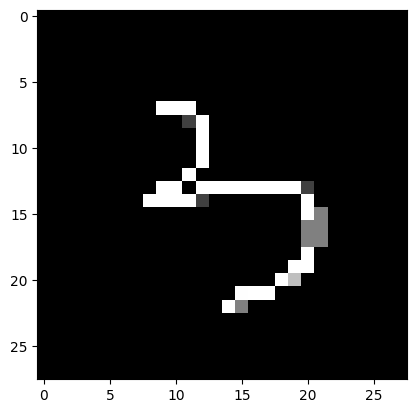

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
PREDICTION:  (3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))


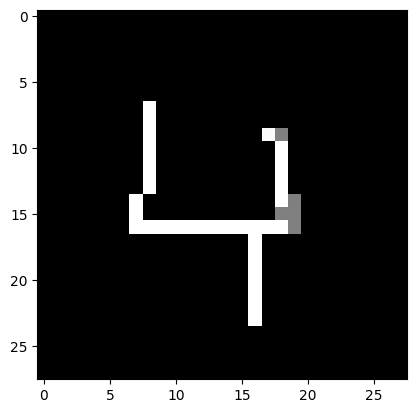

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
PREDICTION:  (4, array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))


In [11]:

a = [t, three, four]
rand = random.randint(0, len(model.X_train))
random_X = model.X_train[rand]
for x in a:
    display_number(x)
    pred = model.predict(x)
    print("PREDICTION: ", pred)

In [12]:
model.save('test_save.h5')